#**Testes Estatísticos usando Python**

Para realizarmos testes estatísticos com python a pricipal biblioteca existente é a **SciPy** ( acesse a documentação [aqui](https://docs.scipy.org/doc/scipy/reference/stats.html)).

Como vimos nos materiais disponibilizados, as possibilidades de testes são muitas. Aqui nesse tutorial, a ideia é passar por dois dos testes mais utilizados um para testar a normalidade dos dados e outro teste para dados normais não pareadas.

Para verificar as funções para realizar os demais testes usando a biblioteca SciPy, sugiro acessar [esse material](https://tmfilho.github.io/pyestbook/math/03_scip.html#testes-de-hipotese) ou a própria documentação da biblioteca.


## **Importanto os dados**

Para esse tutorial vamos usar uma base adaptada de restaurantes de São Paulo cadastrados em uma empresa FoodTech - dados foram descaracterizados. Nessa base temos o identificator do restaurante, a categoria (os restaurantes estão dividido em categoria A e B) e o número de pedidos de um mês. As categorias siginificam diferentes planos de cadastro que os restaurantes tem acesso ao fecharem contrato com a empresa.

Baixe a base de dados em CSV [aqui](https://docs.google.com/spreadsheets/d/1FIwfQJpePLXfpYTCt6GtlPFdN-l0fmfmXASYOxof7vg/edit#gid=1901110975).

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
#importando a biblioteca pandas
import pandas as pd

#Importando o dataset
dataset = pd.read_csv('3.3_dataset.csv')
dataset.head()

,restaurante,categoria,pedidos
0,1,CAT_A,564
1,2,CAT_A,3656
2,3,CAT_B,741
3,4,CAT_A,869
4,5,CAT_A,117


In [2]:
df = dataset.copy()

## **Mas o que queremos saber sobre esses restaurantes e essas categorias?**

A princípio, queremos saber se os restaurantes de diferentes categorias possuem diferença na distribuição de pedidos.

Mas precisamos fazer um teste para isso? Vamos verificar...

**Qual a média de pedidos entre categoria A e categoria B?**

In [17]:
print('Média de pedidos por categoria:')
print(f"CAT_A: {round(df[df['categoria'] == 'CAT_A' ]['pedidos'].mean(),2)}")
print(f"CAT_B: {round(df[df['categoria'] == 'CAT_B' ]['pedidos'].mean(),2)}")

Média de pedidos por categoria:
CAT_A: 943.25
CAT_B: 535.12


Pela média, parece que tem diferença sim, mas a média é só um número...

É melhor conferirmos a distribuição dos pedidos.

**Qual a distribuição de pedidos entre as categorias?**

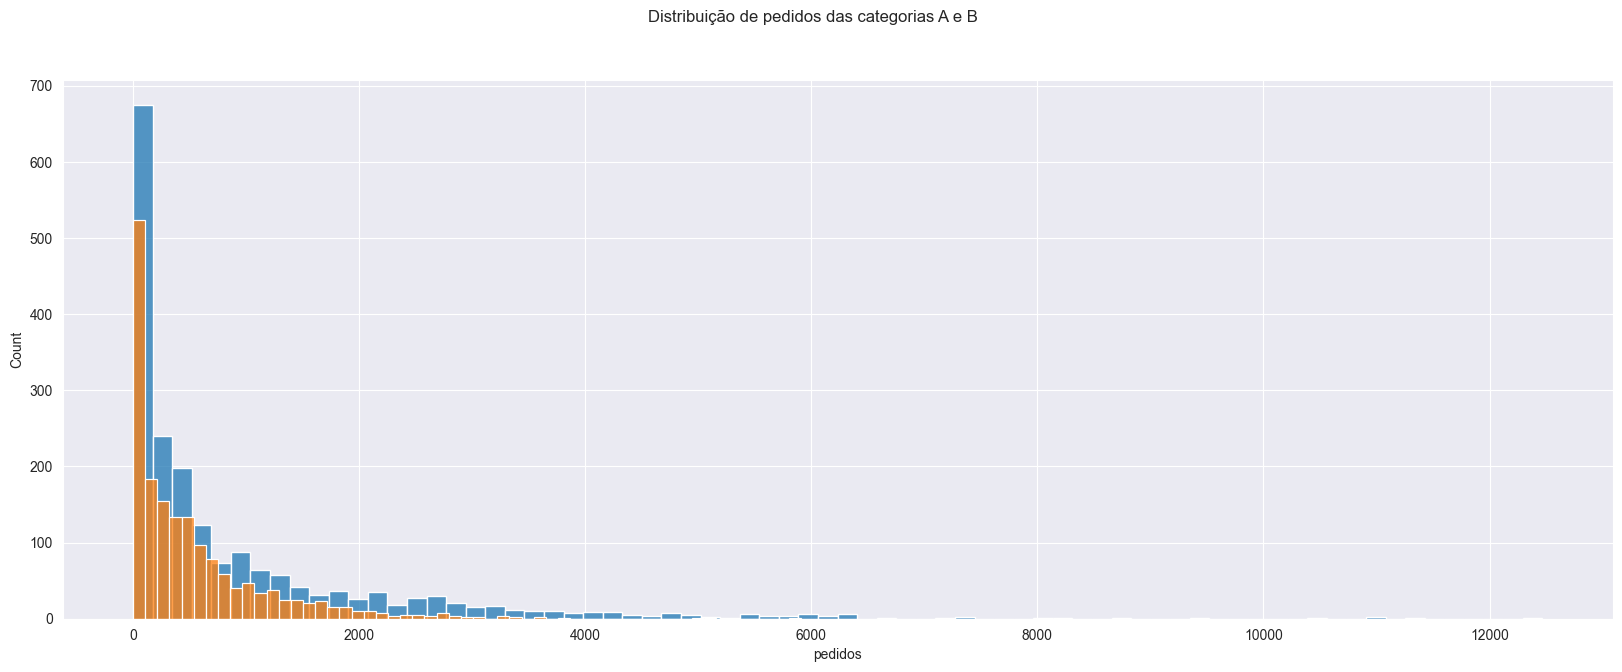

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(20,7))
fig.suptitle('Distribuição de pedidos das categorias A e B')
sns.histplot(dataset[dataset['categoria']=='CAT_A']['pedidos'])
sns.histplot(dataset[dataset['categoria']=='CAT_B']['pedidos']);

### ** Com esse gráfico, a dúvida fica... será que as distribuições realmente possuem diferença em médias? **

## **Os dados seguem uma distribuição Normal?**

Bom, se vamos ter que fazer o teste para verificar se de fato é possível afirmar que a distribuição de pedidos é diferente (ou igual), antes temos que saber se nossos dados seguem uma distribuição normal, pois isso influencia no teste a ser feito, lembram?

In [20]:
import numpy as np
from scipy import stats

In [26]:
from sqlalchemy.sql.expression import true
#inicializa três listas vazias.
#cat_a_means_list armazenará as médias da categoria A, cat_b_means_list armazenará as médias da categoria B e diffs armazenará as diferenças entre as médias dos dois grupos.
cat_a_means_list, cat_b_means_list, diffs = [], [], []

for _ in range(1000):   #Esta linha inicia um loop que será executado 1000 vezes. Cada iteração representa uma amostra de bootstrap.

    #Esta linha cria uma amostra de bootstrap a partir do conjunto de dados dataset. withReplacement=True significa que o mesmo ponto de dados pode ser amostrado mais de uma vez, e fraction=1.0 significa que o tamanho da amostra é o mesmo que o tamanho original do conjunto de dados.
    bootstrap_sample = df.sample(replace=True, frac=1.0)


    #Estas linhas calculam a média da coluna pedidos para a categoria
    cat_a_mean = bootstrap_sample[bootstrap_sample['categoria'] == 'CAT_A']['pedidos'].mean()
    cat_b_mean = bootstrap_sample[bootstrap_sample['categoria'] == 'CAT_B']['pedidos'].mean()

    #Estas linhas adicionam a média calculada da categoria às listas
    cat_a_means_list.append(cat_a_mean)
    cat_b_means_list.append(cat_b_mean)

    #Esta linha calcula a diferença entre as médias e adiciona à lista
    diffs.append(cat_a_mean - cat_b_mean)

    #Esta linha imprime o número atual da iteração a cada 200 iterações.
    for i in range(0, 1000, 200):
      print(i)

0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400
600
800
0
200
400


**Verificando a distribuição amostral**

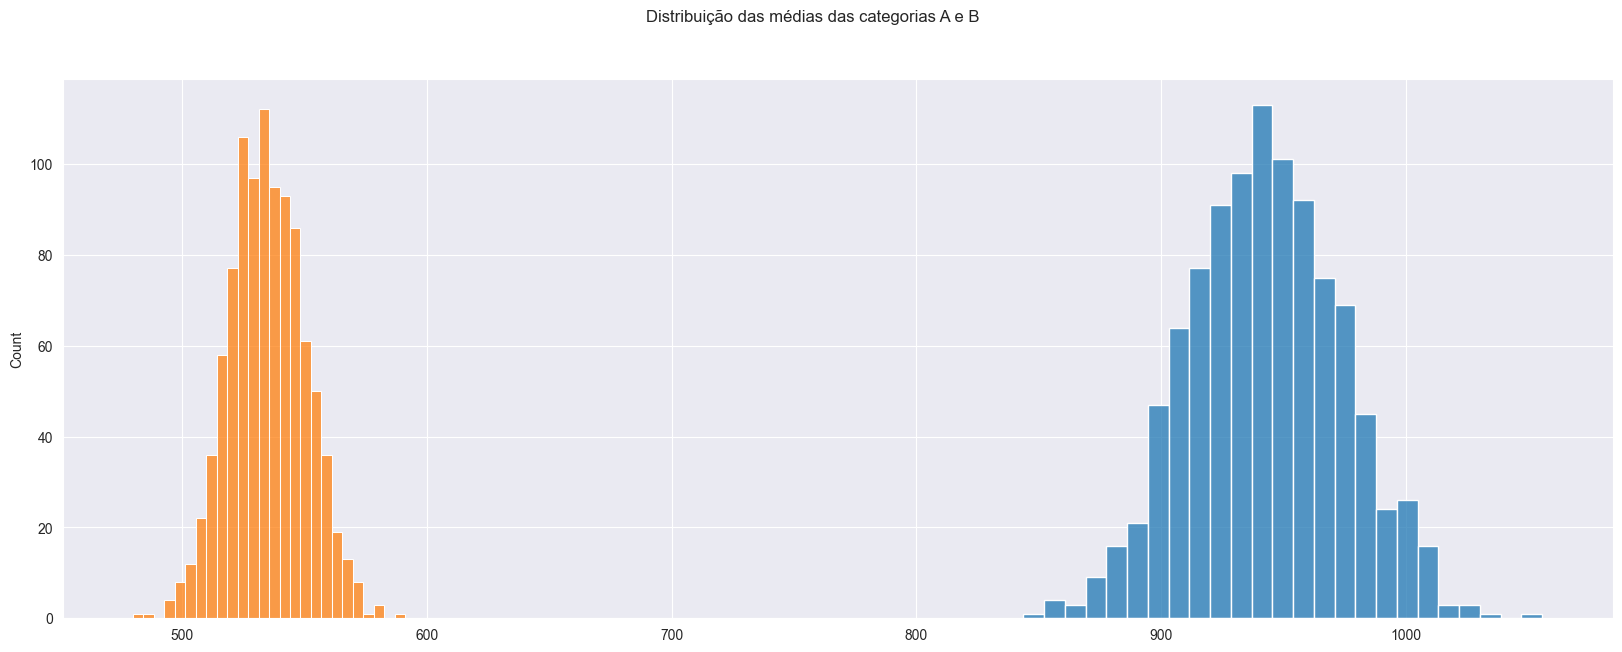

In [27]:
fig, axs = plt.subplots(figsize=(20,7))
fig.suptitle('Distribuição das médias das categorias A e B')
sns.histplot(cat_a_means_list)
sns.histplot(cat_b_means_list);

**Aplicando o teste de Kolgomorov Smirnov**

Referencia:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

 two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

In [36]:
ksResult_A = stats.kstest(cat_a_means_list, 'norm', args=stats.norm.fit(cat_a_means_list))
ksResult_B = stats.kstest(cat_b_means_list, 'norm', args=stats.norm.fit(cat_b_means_list))

print('p-values:')
print(f'Cat_A: {round(ksResult_A.pvalue,2)}')
print(f'Cat_B: {round(ksResult_B.pvalue,2)}')

p-values:
Cat_A: 0.97
Cat_B: 0.71


## **Aplicando o Teste Estatístico**

Temos que aplicar o teste para dados quantitativos que segue uma distribuição normal e sabendo que vamos comparar dois grupo não pareados (independentes).

Com isso temos que aplicar o teste t não pareado.

**Definição das hipóteses:**

H0: u1 = u2 -> u1 - u2 = 0 (médias iguais)

H1: u1 != u2 -> u1 - u2 != 0 (médias diferentes)

Estatística t = 11.208584173308154
p-valor = 1.0813624458242251e-28
Rejeitamos a hipótese nula!


In [42]:
cat_a_list = df[df['categoria'] == 'CAT_A']['pedidos'].tolist()
cat_b_list = df[df['categoria'] == 'CAT_B']['pedidos'].tolist()

#Aplicando o teste t não pareado
t_results = stats.ttest_ind(cat_a_list, cat_b_list)
print('t-statistic:', t_results.statistic)
print('p-value:', t_results.pvalue)

t-statistic: 11.208584173308154
p-value: 1.0813624458242251e-28
